In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the data
df_auc = pd.read_csv("/neurospin/dico/rmenasria/Runs/03_main/Output/csv/prematurity_AUC_by_region_1205.csv")  
df_sulci = pd.read_csv("/neurospin/dico/rmenasria/Runs/03_main/Output/csv/sulci_gravity_center_shifts.csv")  


In [10]:
sulci_list=df_sulci["sulcus"].values
print("Sulcus list",sulci_list)

regions_list=df_auc["region"].values 
regions_list=[ x for x in regions_list if x.endswith("left")]
print("Regions list", regions_list)

Sulcus list ['F.Cal.ant.-Sc.Cal._left' 'F.I.P.r.int.1_left' 'S.Pe.C.marginal._left'
 'F.C.L.r.retroC.tr._left' 'F.C.L.r.sc.post._left' 'S.T.i.post._left'
 'F.C.L.r.asc._left' 'S.F.sup._left' 'S.F.marginal._left' 'F.P.O._left'
 'S.Call._left' 'S.R.sup._left' 'ventricle_left' 'S.Pe.C.inter._left'
 'S.O.T.lat.ant._left' 'S.C._left' 'F.C.L.a._left' 'S.C.LPC._left'
 'S.Olf._left' 'S.Po.C.sup._left' 'S.Pe.C.median._left' 'S.Li._left'
 'S.Or._left' 'S.F.median._left' 'S.F.inf._left' 'F.C.L.r.diag._left'
 'S.T.s.ter.asc.ant._left' 'S.Pa.sup._left' 'S.Rh._left'
 'S.F.orbitaire._left' 'S.T.s.ter.asc.post._left' 'S.R.inf._left'
 'S.Pe.C.inf._left' 'OCCIPITAL_left' 'F.C.L.r.sc.ant._left' 'S.Cu._left'
 'F.C.M.post._left' 'F.C.M.ant._left' 'S.T.pol._left' 'S.O.p._left'
 'F.C.L.p._left' 'S.F.int._left' 'S.Pa.t._left' 'INSULA_left'
 'S.F.inter._left' 'S.F.polaire.tr._left' 'S.Pa.int._left'
 'S.O.T.lat.post._left' 'S.p.C._left' 'F.I.P._left' 'F.I.P.r.int.2_left'
 'F.C.L.r.ant._left' 'S.T.s._left' 'S.Pe

In [12]:
sulci_region_mapping_dict={
 'F.Cal.ant.-Sc.Cal._left': 'FPO-SCu-ScCal_left',
 'F.I.P.r.int.1_left': 'FIP_left',
 'S.Pe.C.marginal._left': 'SFmarginal-SFinfant_left',
 'F.C.L.r.retroC.tr._left': 'FColl-SRh_left',
 'F.C.L.r.sc.post._left': 'FCMpost-SpC_left',
 'S.T.i.post._left': 'STs_left',
 'F.C.L.r.asc._left': 'FColl-SRh_left',
 'S.F.sup._left': 'STs_left',
 'S.F.marginal._left': 'SFmarginal-SFinfant_left',
 'F.P.O._left': 'FIP_left',
 'S.Call._left': 'ScCal-SLi_left',
 'S.R.sup._left': 'STs_left',
 'ventricle_left': 'SFint-SR_left',
 'S.Pe.C.inter._left': 'SPeC_left',
 'S.O.T.lat.ant._left': 'STi-SOTlat_left',
 'S.C._left': 'SPoC_left',
 'F.C.L.a._left': 'FColl-SRh_left',
 'S.C.LPC._left': 'SFint-SR_left',
 'S.Olf._left': 'SOr-SOlf_left',
 'S.Po.C.sup._left': 'SPoC_left',
 'S.Pe.C.median._left': 'SPeC_left',
 'S.Li._left': 'SOr_left',
 'S.Or._left': 'SOr_left',
 'S.F.median._left': 'SFmedian-SFpoltr-SFsup_left',
 'S.F.inf._left': 'SFinter-SFsup_left',
 'F.C.L.r.diag._left': 'FColl-SRh_left',
 'S.T.s.ter.asc.ant._left': 'STi-STs-STpol_left',
 'S.Pa.sup._left': 'STs_left',
 'S.Rh._left': 'STs_left',
 'S.F.orbitaire._left': 'SOr_left',
 'S.T.s.ter.asc.post._left': 'STi-STs-STpol_left',
 'S.R.inf._left': 'STs_left',
 'S.Pe.C.inf._left': 'SPeC_left',
 'OCCIPITAL_left': 'OCCIPITAL_left',
 'F.C.L.r.sc.ant._left': 'FCMpost-SpC_left',
 'S.Cu._left': 'SFint-SR_left',
 'F.C.M.post._left': 'FCMpost-SpC_left',
 'F.C.M.ant._left': 'FCMpost-SpC_left',
 'S.T.pol._left': 'STs_left',
 'S.O.p._left': 'SPoC_left',
 'F.C.L.p._left': 'FCMpost-SpC_left',
 'S.F.int._left': 'SFint-FCMant_left',
 'S.Pa.t._left': 'STs_left',
 'INSULA_left': 'FCLp-subsc-FCLa-INSULA_left',
 'S.F.inter._left': 'SFint-SR_left',
 'S.F.polaire.tr._left': 'SFinter-SFsup_left',
 'S.Pa.int._left': 'SsP-SPaint_left',
 'S.O.T.lat.post._left': 'STi-SOTlat_left',
 'S.p.C._left': 'SPeC_left',
 'F.I.P._left': 'FIP_left',
 'F.I.P.r.int.2_left': 'FIP_left',
 'F.C.L.r.ant._left': 'FColl-SRh_left',
 'S.T.s._left': 'STs_left',
 'S.Pe.C.sup._left': 'SPeC_left',
 'S.s.P._left': 'STs_left',
 'F.Coll._left': 'FColl-SRh_left',
 'S.T.i.ant._left': 'STi-SOTlat_left',
 'F.I.P.Po.C.inf._left': 'FIP_left'
}


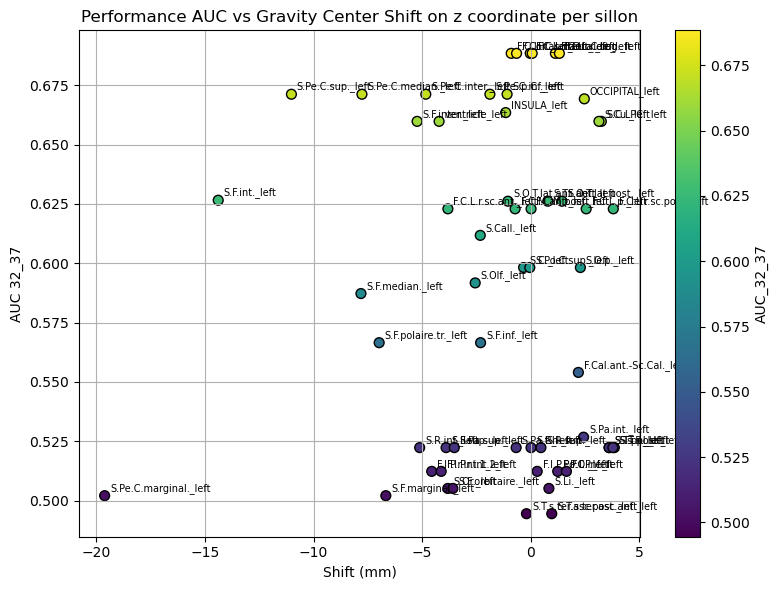

In [44]:
# Associer chaque sulcus à sa région
df_sulci['region'] = df_sulci['sulcus'].map(sulci_region_mapping_dict)

# Joindre le score AUC_27_32
df_plot = df_sulci.merge(df_auc[['region', 'AUC_32_37']], on='region', how='left')

# Tracer le scatter plot
plt.figure(figsize=(8, 6))
sc = plt.scatter(
    df_plot['shift_z'], 
    df_plot['AUC_32_37'], 
    c=df_plot['AUC_32_37'], 
    cmap='viridis', 
    s=50, 
    edgecolor='k'
)
plt.colorbar(sc, label='AUC_32_37')


for _, row in df_plot.iterrows():
    plt.text(
        row['shift_z'] + 0.25,
        row['AUC_32_37'] + 0.002,
        row['sulcus'],
        fontsize=7)
    

plt.xlabel("Shift (mm)")
plt.ylabel("AUC 32_37")
plt.title("Performance AUC vs Gravity Center Shift on z coordinate per sillon")
plt.grid(True)
plt.tight_layout()
plt.show()